In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
import sympy as sy
from datetime import datetime
# Boltzmann constant
k = sc.Boltzmann

In [65]:
def calculate_total_energy(spins,size) :
    global J
    sum = 0
    # Summing over the spins
    for i in range(size) :
        for j in range(size) :
            sum += spins[i][j]*spins[(j+1) % size][i]
            sum += spins[i][j]*spins[j][(i+1) % size]
    return -J*sum

def random_spin() :
    # Random -1 or 1
    rand_spin = np.random.randint(0,2)*2 - 1
    return rand_spin

def init_spins(size) :
    # Initialize random spins for the whole array
    spins = np.full((size,size),random_spin())
    return spins

def random_position(size) :
    # Returns a random value based on the input size
    return np.random.randint(0,size,2)

def flip_spin(spins, size) : 
    # Flip a random spin
    index_a,index_b = random_position(size)
    spins[index_a][index_b] = -spins[index_a][index_b] 
    return spins

def calculate_delta_energy_from_index(spins, newSpins, size) :
    initial_E = calculate_total_energy(spins,size)
    new_E = calculate_total_energy(newSpins,size)
    return new_E - initial_E

def accept_new_config(spins, newSpins, delta_E) :
    # Compares the energy variation between 2 configurations 
    global T
    global k
    if( delta_E < 0 ) : return newSpins # Flip the spin
    r = np.random.rand()
    if( r <= np.exp(-delta_E/(k*T))) : 
        return newSpins # Flip the spin
    
    return spins # Don't flip the spin

def magnetization(spins) :
    return np.abs(np.sum(spins))/spins.size

    

In [67]:
def metropolis(iterations,n, save_config = False) :
    # Variable initialisation
    global k
    global T
    spins_m = init_spins(n)
    saved_spins = np.zeros((iterations,n))
    Energy = np.zeros(iterations)
    Magnetization = np.zeros(iterations)
    # Running algorithm
    for i in range(iterations) : 
        # Storing Energy and Magnetization values for plotting
        #Energy[i] = calculate_total_energy(spins_m,n)
        Magnetization[i] = magnetization(spins_m)
        # Save spin configurations if needed
        if(save_config) : saved_spins[i] = spins_m
        # Generate a spin flip, calculate the energy delta and decide if the new configuration is kept
        newSpins_m = flip_spin(spins_m,n)
        delta_E_m = calculate_delta_energy_from_index(spins_m,newSpins_m,n)
        spins_m = accept_new_config(spins_m,newSpins_m,delta_E_m)
    if(True) : # Plot the energy and magnetization 
        x = np.arange(0,iterations,1)
        fig, axis = plt.subplots(nrows=2, ncols=1, figsize = (11,8))
        
        axis[0].plot(x,Energy, color = "r", linewidth = 3, label ="total energy")
        axis[0].set_xlabel('Number of iterations')
        axis[0].set_ylabel('Energy')
        axis[0].set_facecolor('black')
        
        axis[1].plot(x,Magnetization, color = "y", linewidth = 3, label ="total energy")
        axis[1].set_xlabel('Number of iterations')
        axis[1].set_ylabel('Magnetization')
        axis[1].set_facecolor('black')
        
    return spins_m, saved_spins, Energy

0:01:18.655258


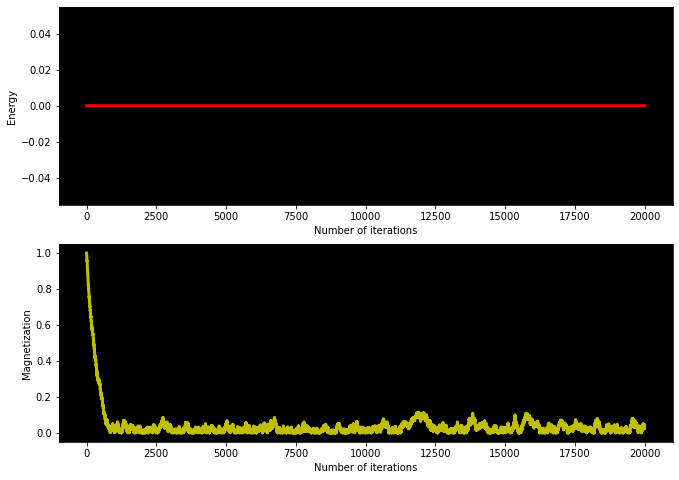

In [72]:
# Parameter initialization
n = 25
J = 1
T = 1/k
# Number of iterations over which the mean will be calculated
average_iterations = 10
iterations = 20000
today = datetime.now()
# Array initilisation
average_E = np.zeros(average_iterations)
#saved_spins = np.zeros((iterations,n))
#for i in range(average_iterations) :
    # Call the metropolis algorithms average_iterations times and save only the last configurations for plotting
    #last_spins, saved_spins, E = metropolis(iterations,n,i==(average_iterations-1))
    #average_E[i] = calculate_total_energy(last_spins)# Parameter initialization

last_spins, saved_spins, E = metropolis(iterations,n)
print(datetime.now() - today)

In [47]:
# Test cases to determine most appropriate number of iterations
# Parameters
J = 1
T = 1/k
n = 25
iterations = 10000

# Array initialisation
spins = init_spins(n)
Energy = np.zeros(iterations)
Energy2 = np.zeros(iterations)
delta_Energy = np.zeros(iterations)
delta_Energy2 = np.zeros(iterations)
# Iterating over spin flips with 10 particles
for i in range(iterations) : 
    Energy[i] = calculate_total_energy(spins,n)
    newSpins = flip_spin(spins,n)
    delta_E = calculate_delta_energy_from_index(spins,newSpins,n)
    delta_Energy[i] = delta_E
    #spins = accept_new_config(spins,newSpins,delta_E)

# Plotting values
x = np.arange(0,iterations,1)

fig, axis = plt.subplots(figsize = (11,4))

axis.plot(x,Energy, color = "r", linewidth = 3, label ="n = 25")
axis.legend(loc=0)
axis.set_xlabel('Number of iterations')
axis.set_ylabel('Energy')
axis.set_facecolor('black')

(25, 25)


KeyboardInterrupt: 

In [63]:
print(spins.size)


625
